# SME0320 - Estatística I

Monitoria - Aula Prática de Análise de Dados


---

## Apresentação ao ambiente Jupyter

### Células de texto e de código

O ambiente de trabalho do Jupyter é composto por células de texto e de código. O ambiente funciona de forma interativa, permitindo que o usuário interaja com o código ao executá-lo. Exemplo de célula de código:

In [1]:
a = 25
b = 35

a

25

Após indicados valores para as variáveis, a célula de código devolveu o valor da variável 'a' por ter sido a última linha do código. Exemplo se quiséssemos a soma das variáveis:

In [2]:
a + b

60

Se colocamos um novo valor para 'a' perceba que o resultado da célula de cima será alterado. Isso ocorre pois na execução do Notebook Jupyter, existe uma espécie de memória alocada para as variáveis.

In [3]:
a = 37

### Bibliotecas

#### ![Pandas](https://pandas.pydata.org/static/img/pandas_white.svg)

Pandas é uma biblioteca de Python que permite trabalhar com conjuntos de dados ao possibilitar diversas funções de análise apropriadas para análise.

Mais exemplos de funções do Pandas: [Pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html).

Vamos carregar um conjunto de dados de tartarugas:

In [1]:
import pandas as pd

# Lê o arquivo csv
dadosTartaruga = pd.read_csv("turtles.csv")

# Mostra 10 primeiras observações do csv
dadosTartaruga.head(10)

,INDEX,COLLECTION,SEX,LENGTH,WIDTH,HEIGHT
0,1,"""CMNH""","""F""",202,156,89
1,2,"""CMNH""","""F""",198,153,91
2,3,"""CMNH""","""F""",198,153,89
3,4,"""CMNH""","""F""",213,164,90
4,5,"""CMNH""","""F""",214,165,88
5,6,"""CMNH""","""F""",162,132,67
6,7,"""CMNH""","""F""",203,157,84
7,8,"""CMNH""","""F""",186,150,80
8,9,"""SREL""","""F""",196,163,85
9,10,"""SREL""","""F""",225,183,100


#### ![Matplotlib](https://matplotlib.org/_static/images/logo2.svg)

Temos também bibliotecas para visualização de gráficos, sendo uma das mais conhecidas a Matplotlib. 

Para mais exemplos de funções acesse: [matplotlib.org](https://matplotlib.org/).

Temos, por exemplo, o seguinte gráfico em barras para quantidade de tartarugas machos e fêmeas:

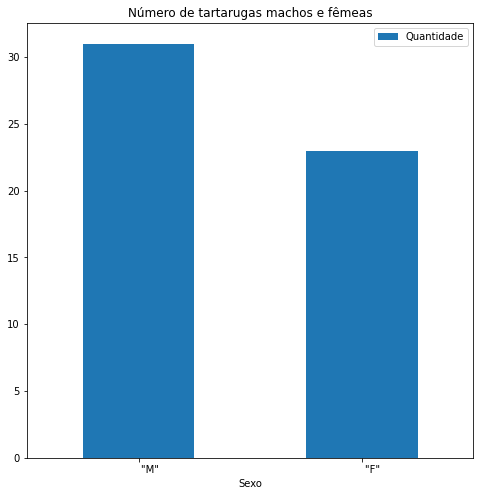

In [30]:
import matplotlib.pyplot as plt

# Frequência para cada tipo único da variável SEX
sex = dadosTartaruga['SEX'].value_counts().to_frame().reset_index()

# Nome para as colunas
sex.columns = ['Sexo', 'Quantidade']

# Gráfico em barras
sex.plot.bar(x = 'Sexo', y = 'Quantidade', rot = 0, title = "Número de tartarugas machos e fêmeas");

# Configurações da parte gráfica
fig = plt.gcf()
fig.set_size_inches(8, 8) # Tamanho da imagem

plt.show();

#### ![SciPy](https://www.firelinescience.com/wp-content/uploads/2019/09/SciPy-Logo.png)

SciPy é uma biblioteca de computação científica para Python. Ela contém diversas funções estatísticas que podem ser úteis para análise de dados.

Para mais informações das funções acesse: [Statistical functions](https://docs.scipy.org/doc/scipy/reference/stats.html).

Encontrando o valor Z dado o percentil 0.975 na distribuição normal:

In [35]:
from scipy import stats

stats.norm.ppf(0.975)

1.959963984540054

Encontrando o percentil dado o valor Z:

In [38]:
stats.norm.cdf(1.96)

0.9750021048517795

## Análise Descritiva

Sobretudo, para uma Análise Descritiva dos dados, é importante nos relembrarmos das características que as variáveis podem assumir:

![img1](imgs/img1.png)

Ao classificar propriamente as variáveis conseguimos adquirir noções de, por exemplo, quais gráficos fazem sentido para a visualização dos dados.

Ainda com os dados das tartarugas, vemos variáveis como COLLECTION, que é uma variável qualitativa. Considerando isso, uma medida interessante de se analisar é a moda:

In [60]:
dadosTartaruga["COLLECTION"].mode()

0      "SREL"
dtype: object

Agora trabalhando com dados de árvores que possui apenas variáveis contínuas para análise:

In [61]:
dadosTree = pd.read_csv("trees.csv")


dadosTree.sample(10)

,Index,"""Girth (in)""","""Height (ft)""","""Volume(ft^3)"""
25,26,17.3,81,55.4
0,1,8.3,70,10.3
13,14,11.7,69,21.3
3,4,10.5,72,16.4
19,20,13.8,64,24.9
6,7,11.0,66,15.6
7,8,11.0,75,18.2
20,21,14.0,78,34.5
30,31,20.6,87,77.0
21,22,14.2,80,31.7


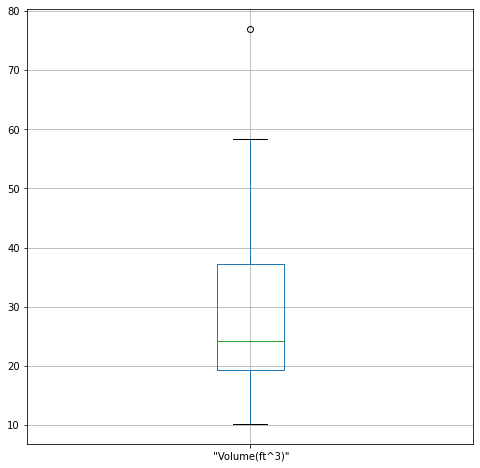

In [56]:
fig = plt.gcf()
fig.set_size_inches(8, 8)

dadosTree.boxplot(column=[' "Volume(ft^3)"']);